# Verifiers Evaluation Analysis

This notebook analyzes the evaluation results from the SWE-Grep OSS environment, focusing on the reward metrics defined in the rubric.


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Load Data

Load the evaluation results from the JSONL file.


In [2]:
# Load the JSONL file
results_path = Path(
    "../outputs/evals/swe-grep-oss-env--Qwen--Qwen3-8B/78b0c169/results.jsonl"
)

data = []
with open(results_path, "r") as f:
    for line in f:
        data.append(json.loads(line))

print(f"Loaded {len(data)} evaluation results")

# Convert to DataFrame for easier analysis
df = pd.DataFrame(data)
df.head()

Loaded 300 evaluation results


,example_id,prompt,completion,task,reward,generation_ms,scoring_ms,total_ms,info,answer,result_tool_check,result_tool_f1,result_tool_precision,result_tool_recall,tool_call_count,max_tokens_check
0,0,[{'content': ' You are a helpful assistant tha...,"[{'content': ' ', 'role': 'assistant', 'tool_...",default,7.0,325858.666420,7.426739,325866.093159,"{'instance_id': 'astropy__astropy-12907', 'max...",diff --git a/astropy/modeling/separable.py b/a...,1.0,0.0,0.0,0.0,5.0,1.0
1,1,[{'content': ' You are a helpful assistant tha...,"[{'content': ' ', 'role': 'assistant', 'tool_...",default,2.0,0.000000,7.534504,7.534504,"{'instance_id': 'astropy__astropy-14182', 'max...",diff --git a/astropy/io/ascii/rst.py b/astropy...,0.0,0.0,0.0,0.0,2.0,0.0
2,2,[{'content': ' You are a helpful assistant tha...,"[{'content': ' ', 'role': 'assistant', 'tool_...",default,7.0,455875.408649,7.360458,455882.769108,"{'instance_id': 'astropy__astropy-14365', 'max...",diff --git a/astropy/io/ascii/qdp.py b/astropy...,1.0,0.0,0.0,0.0,5.0,1.0
3,3,[{'content': ' You are a helpful assistant tha...,"[{'content': ' <tool_call> {""name"": ""bash"", ""...",default,1.0,64561.590195,15.353203,64576.943398,"{'instance_id': 'astropy__astropy-14995', 'max...",diff --git a/astropy/nddata/mixins/ndarithmeti...,0.0,0.0,0.0,0.0,0.0,1.0
4,4,[{'content': ' You are a helpful assistant tha...,"[{'content': ' ', 'role': 'assistant', 'tool_...",default,5.0,160655.382633,7.596493,160662.979126,"{'instance_id': 'astropy__astropy-6938', 'max_...",diff --git a/astropy/io/fits/fitsrec.py b/astr...,1.0,0.0,0.0,0.0,3.0,1.0


## Reward Metrics Overview

The following reward metrics are defined in the rubric:

1. **result_tool_check**: Whether the result tool was called
2. **result_tool_f1**: F1 score of predicted file paths
3. **result_tool_precision**: Precision of predicted file paths
4. **result_tool_recall**: Recall of predicted file paths
5. **tool_call_count**: Number of tool calls made (normalized)
6. **max_tokens_check**: Whether token limit was exceeded


In [3]:
# Extract reward columns
reward_columns = [
    "result_tool_check",
    "result_tool_f1",
    "result_tool_precision",
    "result_tool_recall",
    "tool_call_count",
    "max_tokens_check",
    "reward",
]

# Display basic statistics
df[reward_columns].describe()

,result_tool_check,result_tool_f1,result_tool_precision,result_tool_recall,tool_call_count,max_tokens_check,reward
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.746667,0.199512,0.177336,0.276667,4.286667,0.936667,6.623515
std,0.435647,0.356754,0.340640,0.448098,1.489480,0.243968,2.362828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,6.000000
50%,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,7.000000
75%,1.000000,0.333333,0.200000,1.000000,5.000000,1.000000,8.026170
max,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,10.000000


## Distribution of Individual Rewards


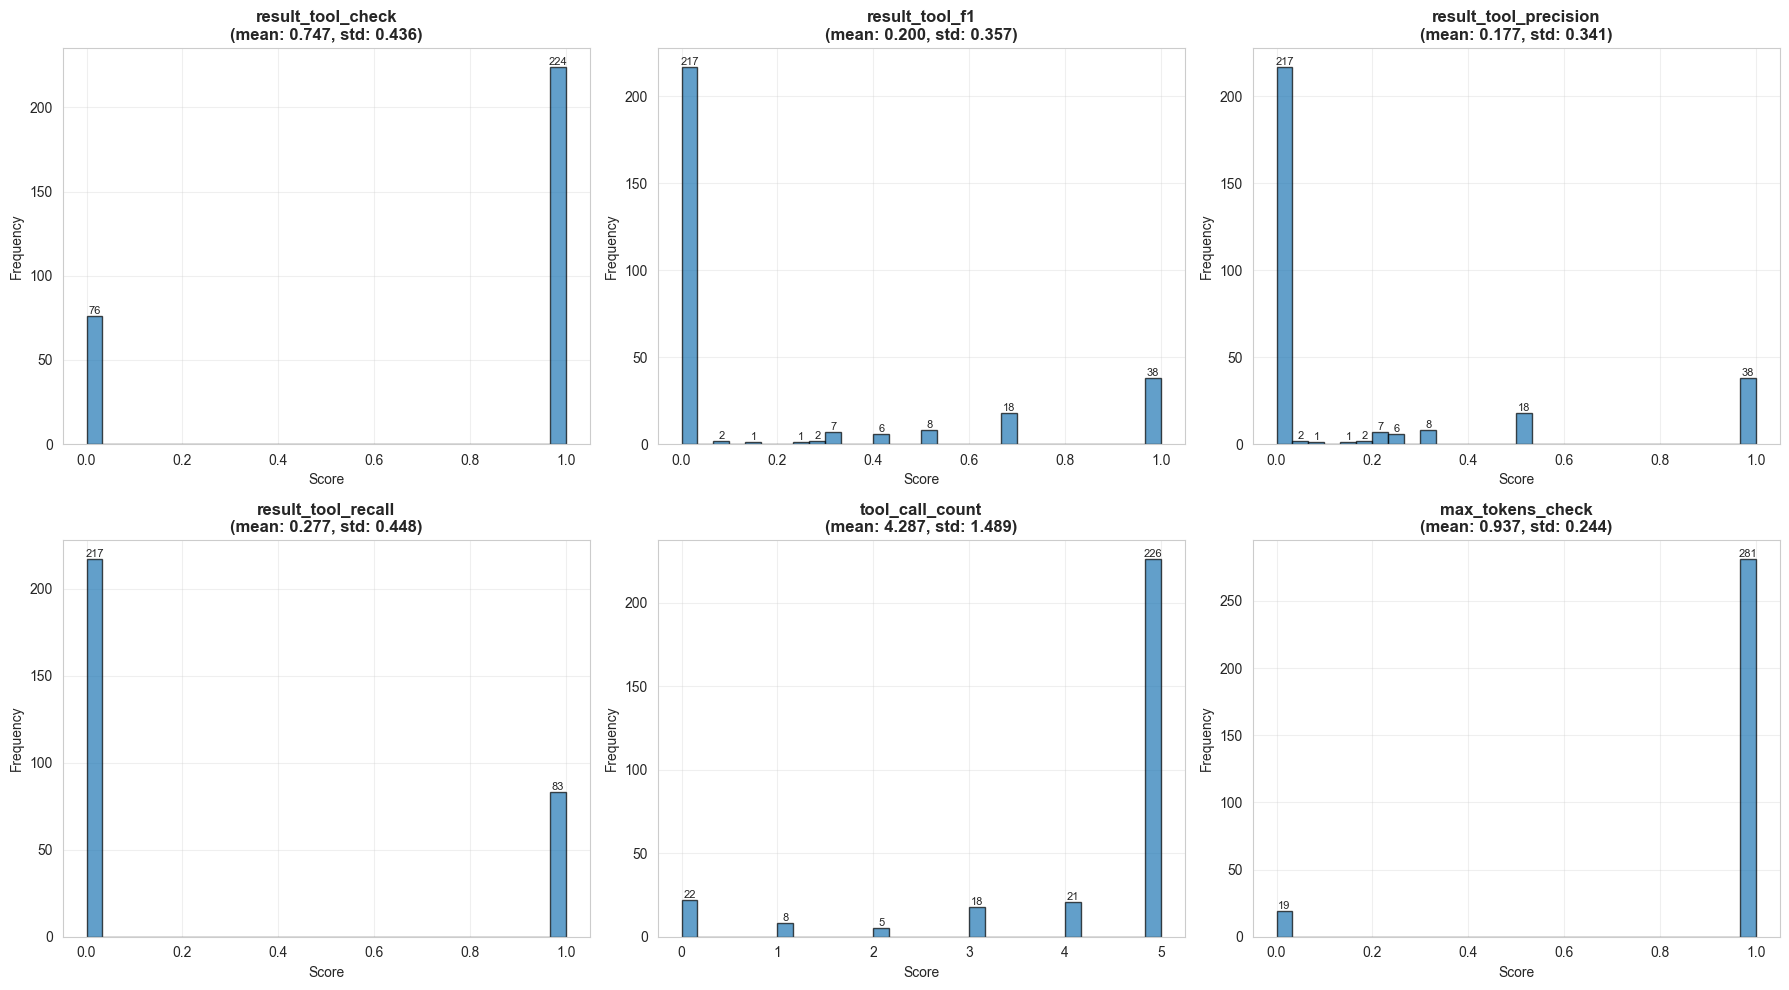

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

reward_metrics = [
    "result_tool_check",
    "result_tool_f1",
    "result_tool_precision",
    "result_tool_recall",
    "tool_call_count",
    "max_tokens_check",
]

for idx, metric in enumerate(reward_metrics):
    ax = axes[idx]
    data_to_plot = df[metric].dropna()

    # Create histogram
    counts, bins, patches = ax.hist(
        data_to_plot, bins=30, edgecolor="black", alpha=0.7
    )

    # Add count labels above bars
    for count, patch in zip(counts, patches):
        if count > 0:  # Only show label if count is non-zero
            height = patch.get_height()
            ax.text(
                patch.get_x() + patch.get_width() / 2.0,
                height,
                f"{int(count)}",
                ha="center",
                va="bottom",
                fontsize=8,
            )

    ax.set_title(
        f"{metric}\n(mean: {data_to_plot.mean():.3f}, std: {data_to_plot.std():.3f})",
        fontsize=12,
        fontweight="bold",
    )
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Overall Performance Metrics

Aggregate metrics across all evaluation instances:


OVERALL PERFORMANCE METRICS
Accuracy (Result Tool Called) : 0.7467 (74.67%)
F1 Score                      : 0.1995 (19.95%)
Precision                     : 0.1773 (17.73%)
Recall                        : 0.2767 (27.67%)


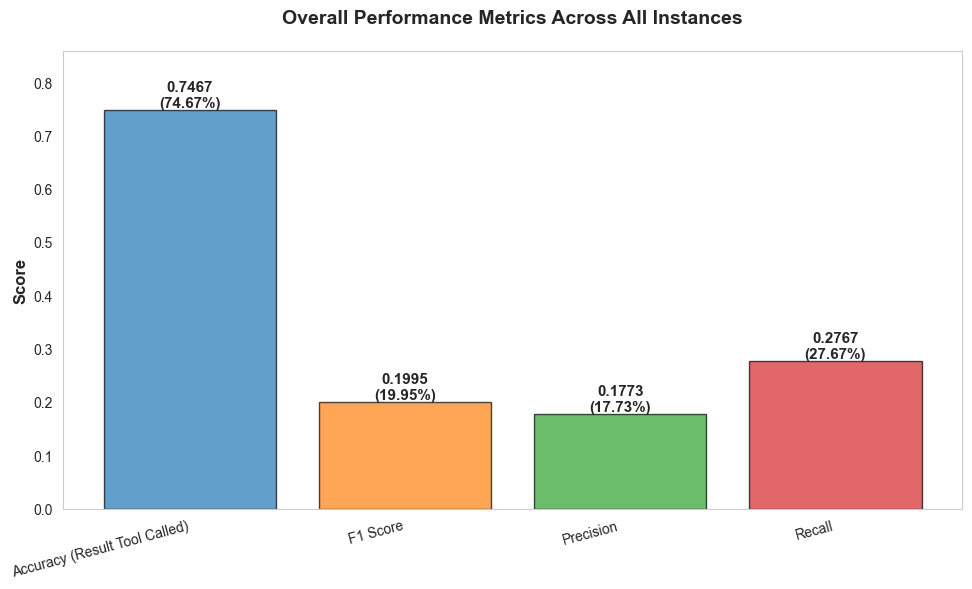

In [5]:
# Calculate overall metrics
overall_metrics = {
    "Accuracy (Result Tool Called)": df["result_tool_check"].mean(),
    "F1 Score": df["result_tool_f1"].mean(),
    "Precision": df["result_tool_precision"].mean(),
    "Recall": df["result_tool_recall"].mean(),
}

# Display as a formatted table
print("=" * 50)
print("OVERALL PERFORMANCE METRICS")
print("=" * 50)
for metric_name, value in overall_metrics.items():
    print(f"{metric_name:30s}: {value:.4f} ({value*100:.2f}%)")
print("=" * 50)

# Also create a visual bar chart
fig, ax = plt.subplots(figsize=(10, 6))
metrics_names = list(overall_metrics.keys())
metrics_values = list(overall_metrics.values())

bars = ax.bar(
    metrics_names,
    metrics_values,
    color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"],
    alpha=0.7,
    edgecolor="black",
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.4f}\n({height*100:.2f}%)",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

ax.set_ylabel("Score", fontsize=12, fontweight="bold")
ax.set_title(
    "Overall Performance Metrics Across All Instances",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
ax.set_ylim(0, max(metrics_values) * 1.15)  # Add space for labels
ax.grid(False)
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()

## Tool Call Analysis

Distribution of tool calls and errors per instance:


TOOL CALL STATISTICS PER INSTANCE
Total tool calls:      mean=5.88, median=6, max=28
Error tool calls:      mean=1.45, median=1, max=9
Error percentage:      mean=21.16%


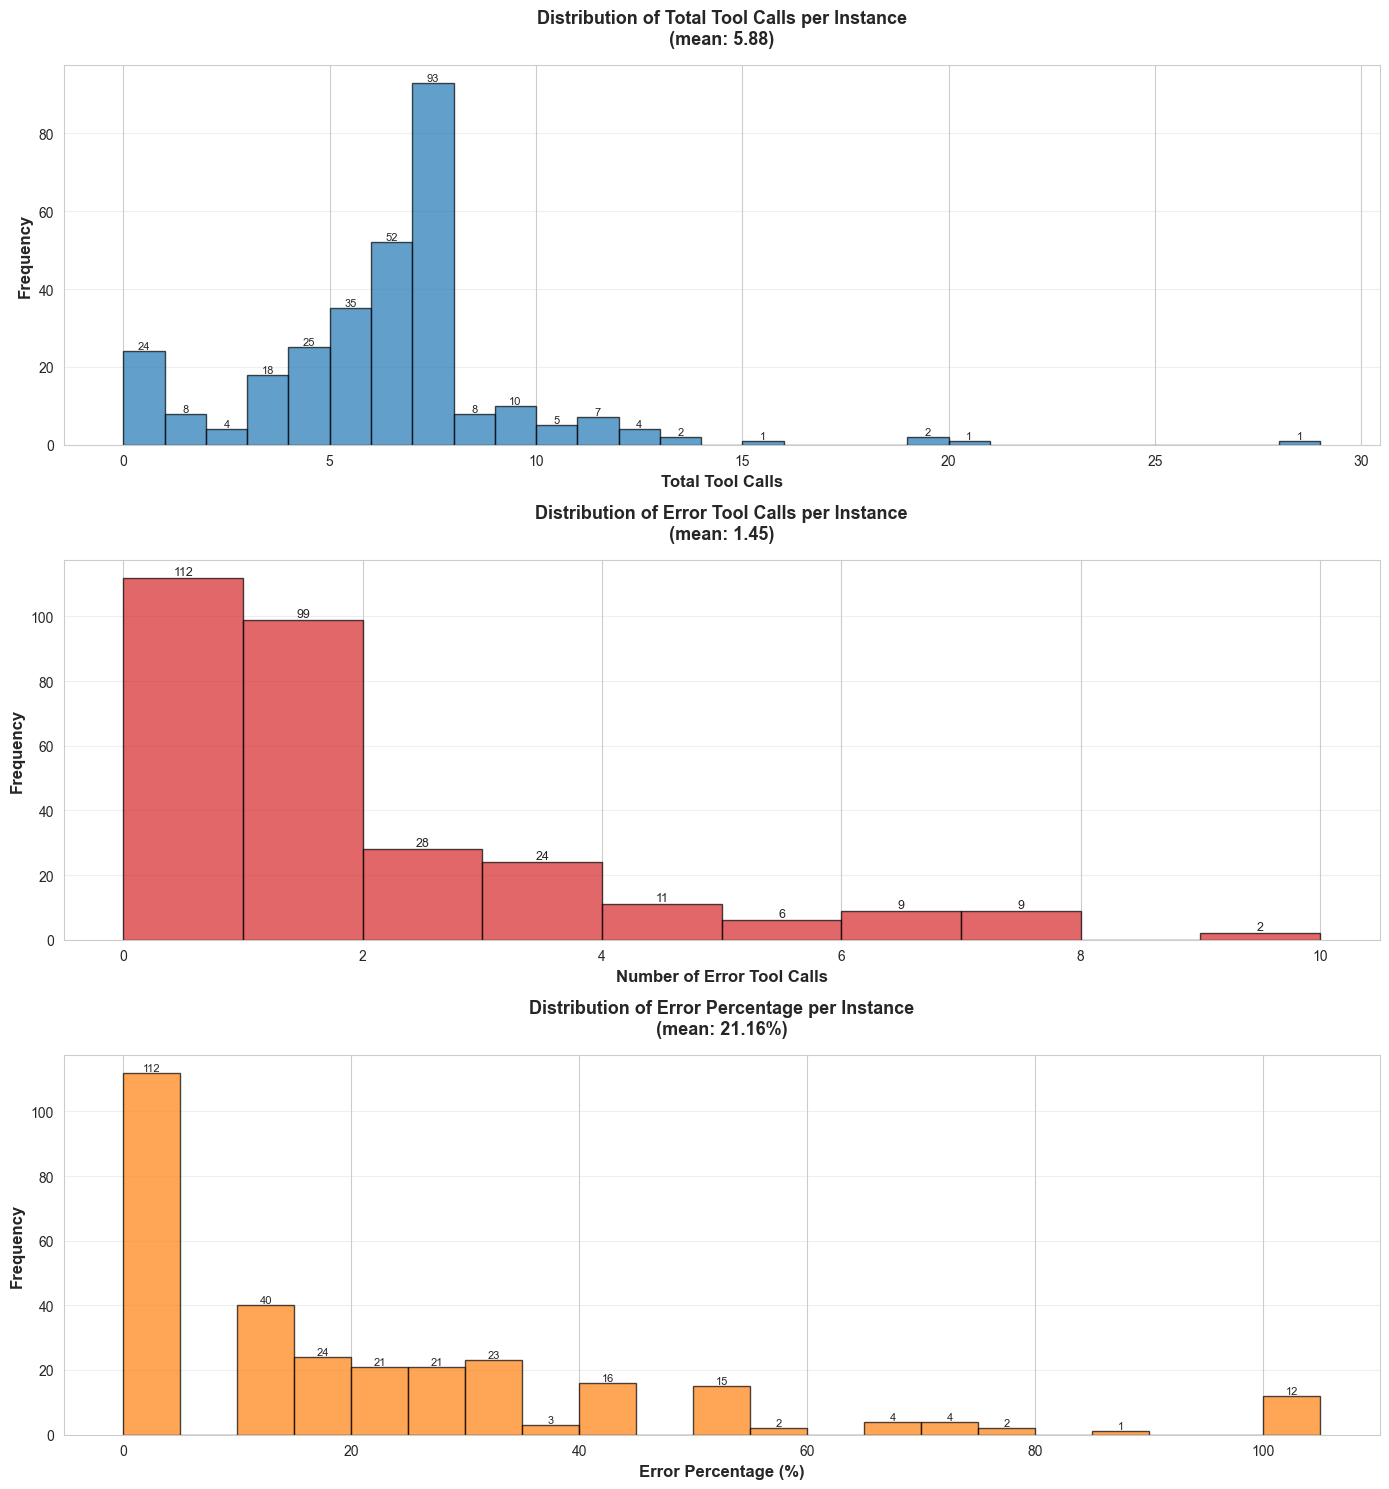

In [6]:
# Count tool messages for each instance
total_tool_counts = []
error_tool_counts = []
error_percentages = []

for idx, row in df.iterrows():
    completion = row["completion"]
    total_tools = 0
    error_tools = 0

    for message in completion:
        if message.get("role") == "tool":
            total_tools += 1
            content = message.get("content", "")
            if content.startswith("Error"):
                error_tools += 1

    total_tool_counts.append(total_tools)
    error_tool_counts.append(error_tools)
    error_percentage = (
        (error_tools / total_tools * 100) if total_tools > 0 else 0
    )
    error_percentages.append(error_percentage)

# Add to dataframe
df["total_tool_count"] = total_tool_counts
df["error_tool_count"] = error_tool_counts
df["error_tool_percentage"] = error_percentages

# Display summary statistics
print("=" * 60)
print("TOOL CALL STATISTICS PER INSTANCE")
print("=" * 60)
print(
    f"Total tool calls:      mean={sum(total_tool_counts)/len(total_tool_counts):.2f}, "
    f"median={sorted(total_tool_counts)[len(total_tool_counts)//2]}, "
    f"max={max(total_tool_counts)}"
)
print(
    f"Error tool calls:      mean={sum(error_tool_counts)/len(error_tool_counts):.2f}, "
    f"median={sorted(error_tool_counts)[len(error_tool_counts)//2]}, "
    f"max={max(error_tool_counts)}"
)
print(
    f"Error percentage:      mean={sum(error_percentages)/len(error_percentages):.2f}%"
)
print("=" * 60)

# Visualize distributions
fig, axes = plt.subplots(3, 1, figsize=(14, 15))

# 1. Total tool calls per instance
ax1 = axes[0]
# Create bins with gap of 1
bins1 = range(min(total_tool_counts), max(total_tool_counts) + 2, 1)
counts, bins, patches = ax1.hist(
    total_tool_counts, bins=bins1, edgecolor="black", alpha=0.7, color="#1f77b4"
)
for count, patch in zip(counts, patches):
    if count > 0:
        height = patch.get_height()
        ax1.text(
            patch.get_x() + patch.get_width() / 2.0,
            height,
            f"{int(count)}",
            ha="center",
            va="bottom",
            fontsize=8,
        )
ax1.set_xlabel("Total Tool Calls", fontsize=12, fontweight="bold")
ax1.set_ylabel("Frequency", fontsize=12, fontweight="bold")
ax1.set_title(
    f"Distribution of Total Tool Calls per Instance\n(mean: {sum(total_tool_counts)/len(total_tool_counts):.2f})",
    fontsize=13,
    fontweight="bold",
    pad=15,
)
ax1.grid(True, alpha=0.3, axis="y")

# 2. Error tool calls per instance
ax2 = axes[1]
# Create bins with gap of 1
bins2 = range(0, max(error_tool_counts) + 2, 1)
counts, bins, patches = ax2.hist(
    error_tool_counts,
    bins=bins2,
    edgecolor="black",
    alpha=0.7,
    color="#d62728",
)
for count, patch in zip(counts, patches):
    if count > 0:
        height = patch.get_height()
        ax2.text(
            patch.get_x() + patch.get_width() / 2.0,
            height,
            f"{int(count)}",
            ha="center",
            va="bottom",
            fontsize=9,
        )
ax2.set_xlabel("Number of Error Tool Calls", fontsize=12, fontweight="bold")
ax2.set_ylabel("Frequency", fontsize=12, fontweight="bold")
ax2.set_title(
    f"Distribution of Error Tool Calls per Instance\n(mean: {sum(error_tool_counts)/len(error_tool_counts):.2f})",
    fontsize=13,
    fontweight="bold",
    pad=15,
)
ax2.grid(True, alpha=0.3, axis="y")

# 3. Error percentage per instance
ax3 = axes[2]
# Create bins with gap of 5
bins3 = range(0, int(max(error_percentages)) + 6, 5)
counts, bins, patches = ax3.hist(
    error_percentages, bins=bins3, edgecolor="black", alpha=0.7, color="#ff7f0e"
)
for count, patch in zip(counts, patches):
    if count > 0:
        height = patch.get_height()
        ax3.text(
            patch.get_x() + patch.get_width() / 2.0,
            height,
            f"{int(count)}",
            ha="center",
            va="bottom",
            fontsize=8,
        )
ax3.set_xlabel("Error Percentage (%)", fontsize=12, fontweight="bold")
ax3.set_ylabel("Frequency", fontsize=12, fontweight="bold")
ax3.set_title(
    f"Distribution of Error Percentage per Instance\n(mean: {sum(error_percentages)/len(error_percentages):.2f}%)",
    fontsize=13,
    fontweight="bold",
    pad=15,
)
ax3.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()